# Imports

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## This notebook performs topic classification on the generated tweets

### Pipeline to train and perform inference

In [3]:
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.key]

class CategoricalSelector(BaseEstimator, TransformerMixin):
    def __init__(self, keys):
        self.keys = keys
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.keys].values.astype(float)

In [4]:
numeric_features = Pipeline([
    ('selector', CategoricalSelector(['sentiment_mapping']))
])

text_features = Pipeline([
    ('selector', TextSelector('processed_tweet')),
    ('tfidf', TfidfVectorizer(
        max_features=1000,  
        min_df=2,           
        max_df=0.8,         
        ngram_range=(1, 2) 
    ))
])

preprocessor = FeatureUnion([
    ('numeric', numeric_features),
    ('text', text_features)
])

### Import the train data and split it into right and left

In [5]:
train_right = pd.read_csv('files/train/train_right.csv')
train_left = pd.read_csv('files/train/train_left.csv')
train_target_right = pd.read_csv('files/train/train_target_right.csv')
train_target_left = pd.read_csv('files/train/train_target_left.csv')
X_train_right = train_right
y_train_right = train_target_right
X_train_left = train_left
y_train_left = train_target_left

### We here define two different pipelines for the each wing dataset

In [7]:
y_train_right_labels = y_train_right['topic_mapping']

class_weights_right = compute_class_weight('balanced', classes=np.unique(y_train_right_labels), y=y_train_right_labels)
class_weight_dict_right = dict(zip(np.unique(y_train_right_labels), class_weights_right))

full_pipeline_right = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=123, class_weight=class_weight_dict_right,
        n_jobs=-1))
])

In [8]:
y_train_left_labels = y_train_left['topic_mapping']
class_weights_left = compute_class_weight('balanced', classes=np.unique(y_train_left_labels), y=y_train_left_labels)
class_weight_dict_left = dict(zip(np.unique(y_train_left_labels), class_weights_left))
full_pipeline_left= Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=123, class_weight=class_weight_dict_left,
        n_jobs=-1))
])

In [9]:
X_train_right = X_train_right.dropna()
X_train_left = X_train_left.dropna()
y_train_right = y_train_right.loc[X_train_right.index]
y_train_left = y_train_left.loc[X_train_left.index]

In [10]:
full_pipeline_right.fit(X_train_right, y_train_right)

/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('numeric',
                                                 Pipeline(steps=[('selector',
                                                                  CategoricalSelector(keys=['sentiment_mapping']))])),
                                                ('text',
                                                 Pipeline(steps=[('selector',
                                                                  TextSelector(key='processed_tweet')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(max_df=0.8,
                                                                                  max_features=1000,
                                                                                  min_df=2,
                                                                                  ngram_range=(1,
                                                                                               2)))]))])),
                ('classifier',
                 RandomForestClassifier(class_weight={1: 0.7705177705177705,
                                                      3: 1.8451872925557136,
                                                      5: 0.861904761904762},
                                        n_jobs=-1, random_state=123))])

In [11]:
full_pipeline_left.fit(X_train_left, y_train_left)

/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('numeric',
                                                 Pipeline(steps=[('selector',
                                                                  CategoricalSelector(keys=['sentiment_mapping']))])),
                                                ('text',
                                                 Pipeline(steps=[('selector',
                                                                  TextSelector(key='processed_tweet')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(max_df=0.8,
                                                                                  max_features=1000,
                                                                                  min_df=2,
                                                                                  ngram_range=(1,
                                                                                               2)))]))])),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 0.5518408308536087,
                                                      2: 1.689531975705609,
                                                      4: 1.677842824197268},
                                        n_jobs=-1, random_state=123))])

### We now perform inference on the 350 millions parameters' datasets, baseline and finetuned for both parties

In [12]:
baseline_right = pd.read_csv('files/baseline/baseline_right.csv')
baseline_left = pd.read_csv('files/baseline/baseline_left.csv')
baseline_right_target = pd.read_csv('files/baseline/baseline_target_right.csv')
baseline_left_target = pd.read_csv('files/baseline/baseline_target_left.csv')

In [13]:
X_test_right = baseline_right
y_test_right = baseline_right_target
X_test_left = baseline_left
y_test_left = baseline_left_target

/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Confusion Matrix for Right Baseline:
Classification Report for Right Baseline:
                                       precision    recall  f1-score   support

Governance e relazioni internazionali       0.44      0.59      0.50       673
   Questioni economiche e di sviluppo       0.17      0.04      0.06       281
 Valori nazionali e questioni sociali       0.43      0.43      0.43       603

                             accuracy                           0.43      1557
                            macro avg       0.35      0.35      0.33      1557
                         weighted avg       0.39      0.43      0.40      1557



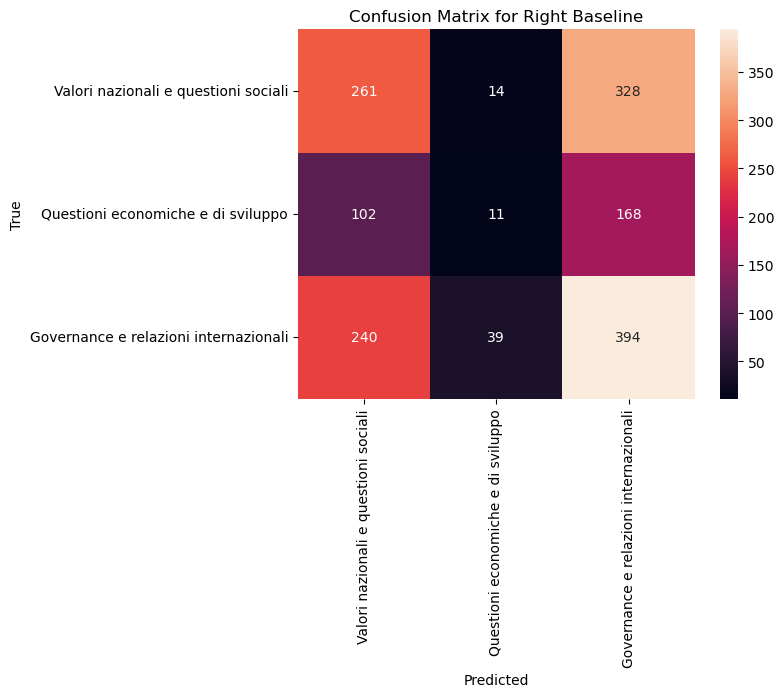

In [14]:
y_pred_right = full_pipeline_right.predict(X_test_right)
#compute  the confusion matrix and classification report
print("Confusion Matrix for Right Baseline:")
print("Classification Report for Right Baseline:")
# Map the predicted and true labels to their textual classes
# Convert y_pred_right to a pandas Series before mapping
class_mapping={ 0: 'Governance e posizionamento politico', 1: 'Governance e relazioni internazionali', 2: 'Politica economica e sociale', 3: 'Questioni economiche e di sviluppo', 4: 'Relazioni internazionali e valori progressisti', 5: 'Valori nazionali e questioni sociali'}
y_pred_right_named = pd.Series(y_pred_right).map(class_mapping)
y_test_right_named = y_test_right['topic_mapping'].map(class_mapping)

# Generate the classification report and confusion matrix
print(classification_report(y_test_right_named, y_pred_right_named))
sns.heatmap(confusion_matrix(y_test_right_named, y_pred_right_named, labels=y_test_right_named.unique()), 
            annot=True, fmt='d', xticklabels=y_test_right_named.unique(), yticklabels=y_test_right_named.unique())
plt.title('Confusion Matrix for Right Baseline')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
X_test_right_f= pd.read_csv('files/finetuned/finetuned_right.csv')
X_test_left_f= pd.read_csv('files/finetuned/finetuned_left.csv')
y_test_left_f = pd.read_csv('files/finetuned/finetuned_target_left.csv')
y_test_right_f = pd.read_csv('files/finetuned/finetuned_target_right.csv')

/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Confusion Matrix for Right Baseline:
Classification Report for Right Baseline:
                                       precision    recall  f1-score   support

Governance e relazioni internazionali       0.43      0.54      0.48       673
   Questioni economiche e di sviluppo       0.11      0.03      0.05       281
 Valori nazionali e questioni sociali       0.38      0.40      0.39       603

                             accuracy                           0.39      1557
                            macro avg       0.31      0.32      0.30      1557
                         weighted avg       0.35      0.39      0.37      1557



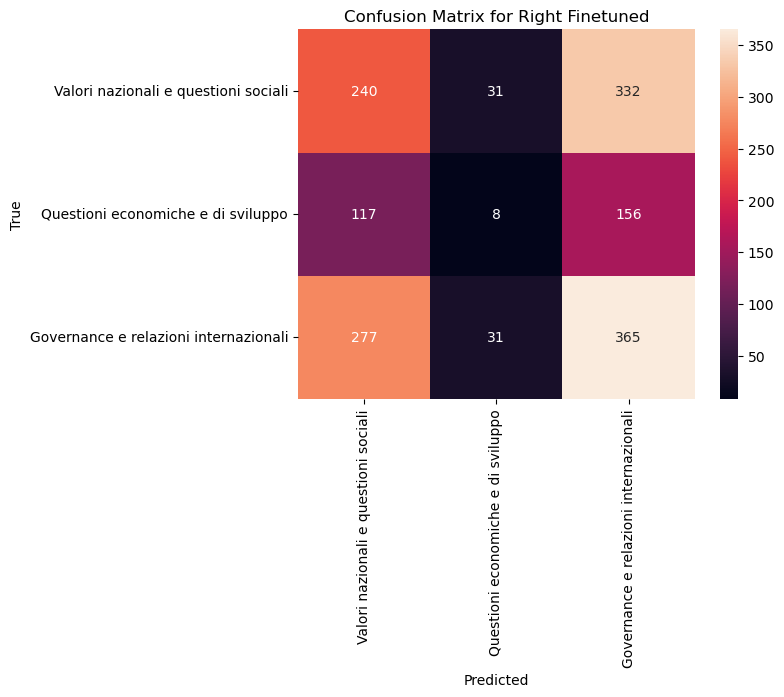

In [16]:
y_pred_right_f = full_pipeline_right.predict(X_test_right_f)
#compute  the confusion matrix and classification report
print("Confusion Matrix for Right Baseline:")
# Map the predicted and true labels to their textual classes
y_pred_right_f_named = pd.Series(y_pred_right_f).map(class_mapping)
y_test_right_f_named = y_test_right_f['topic_mapping'].map(class_mapping)

# Generate the classification report and confusion matrix
print("Classification Report for Right Baseline:")
print(classification_report(y_test_right_f_named, y_pred_right_f_named))
sns.heatmap(confusion_matrix(y_test_right_f_named, y_pred_right_f_named, labels=y_test_right_f_named.unique()), 
            annot=True, fmt='d', xticklabels=y_test_right_f_named.unique(), yticklabels=y_test_right_f_named.unique())

plt.title('Confusion Matrix for Right Finetuned')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Classification Report for Left Baseline:
                                                precision    recall  f1-score   support

          Governance e posizionamento politico       0.60      0.97      0.74      1143
                  Politica economica e sociale       0.30      0.02      0.03       373
Relazioni internazionali e valori progressisti       0.15      0.01      0.02       376

                                      accuracy                           0.59      1892
                                     macro avg       0.35      0.33      0.26      1892
                                  weighted avg       0.45      0.59      0.46      1892



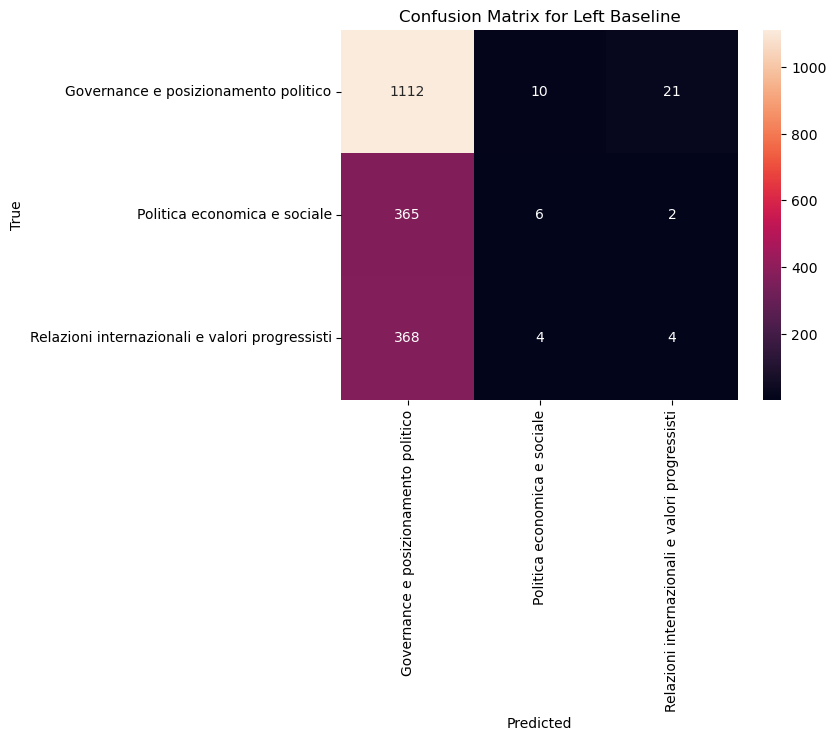

In [17]:
y_pred_left = full_pipeline_left.predict(X_test_left)
#compute  the confusion matrix and classification report
# Map the predicted and true labels to their textual classes
y_pred_left_named = pd.Series(y_pred_left).map(class_mapping)
y_test_left_named = y_test_left['topic_mapping'].map(class_mapping)

# Generate the classification report and confusion matrix
print("Classification Report for Left Baseline:")
print(classification_report(y_test_left_named, y_pred_left_named))

sns.heatmap(confusion_matrix(y_test_left_named, y_pred_left_named, labels=y_test_left_named.unique()), 
            annot=True, fmt='d', xticklabels=y_test_left_named.unique(), yticklabels=y_test_left_named.unique())
plt.title('Confusion Matrix for Left Baseline')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Confusion Matrix for Left Finetuned:
Classification Report for Left Finetuned:
                                                precision    recall  f1-score   support

          Governance e posizionamento politico       0.61      0.97      0.75      1143
                  Politica economica e sociale       0.24      0.02      0.03       373
Relazioni internazionali e valori progressisti       0.23      0.03      0.05       376

                                      accuracy                           0.59      1892
                                     macro avg       0.36      0.34      0.27      1892
                                  weighted avg       0.46      0.59      0.47      1892



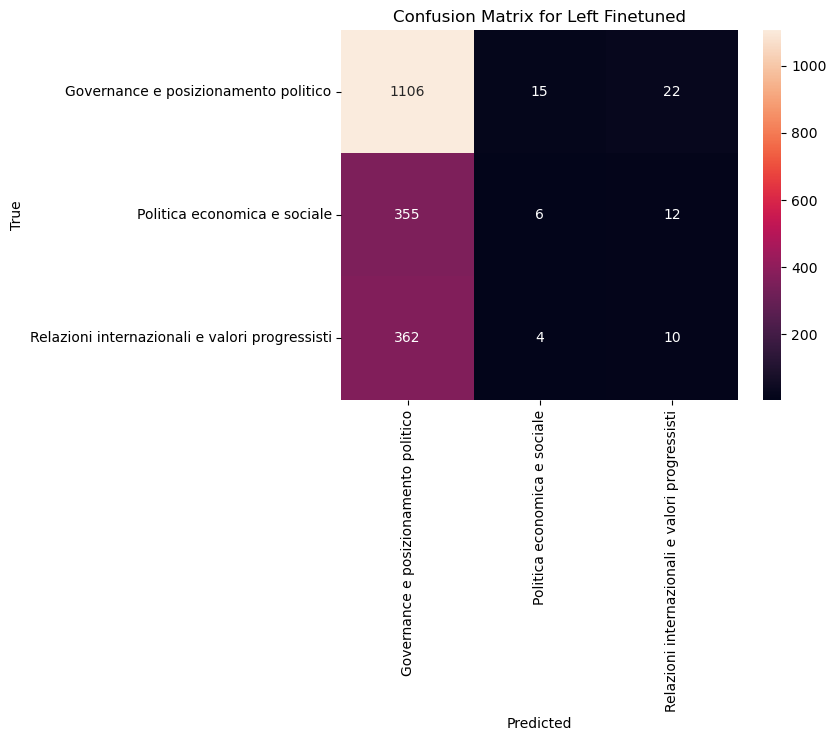

In [18]:
y_pred_left_f = full_pipeline_left.predict(X_test_left_f)
#compute  the confusion matrix and classification report
print("Confusion Matrix for Left Finetuned:")
# Map the predicted and true labels to their textual classes
y_pred_left_f_named = pd.Series(y_pred_left_f).map(class_mapping)
y_test_left_f_named = y_test_left_f['topic_mapping'].map(class_mapping)

# Generate the classification report and confusion matrix
print("Classification Report for Left Finetuned:")
print(classification_report(y_test_left_f_named, y_pred_left_f_named))

sns.heatmap(confusion_matrix(y_test_left_f_named, y_pred_left_f_named, labels=y_test_left_f_named.unique()), 
            annot=True, fmt='d', xticklabels=y_test_left_f_named.unique(), yticklabels=y_test_left_f_named.unique())
plt.title('Confusion Matrix for Left Finetuned')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Now let's perform the same analysis on the one billion parameters' datatasets

In [19]:
X_test_right_b= pd.read_csv('files/baseline_b/baseline_b_right.csv')
X_test_left_b= pd.read_csv('files/baseline_b/baseline_b_left.csv')
y_test_left_b = pd.read_csv('files/baseline_b/baseline_b_target_left.csv')
y_test_right_b = pd.read_csv('files/baseline_b/baseline_b_target_right.csv')

In [20]:
X_test_right_b = X_test_right_b.dropna()
X_test_left_b = X_test_left_b.dropna()
y_test_right_b = y_test_right_b.loc[X_test_right_b.index]
y_test_left_b = y_test_left_b.loc[X_test_left_b.index]

/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Classification Report for Right Baseline 1B:
                                       precision    recall  f1-score   support

Governance e relazioni internazionali       0.43      0.53      0.48       673
   Questioni economiche e di sviluppo       0.07      0.01      0.02       281
 Valori nazionali e questioni sociali       0.41      0.47      0.44       602

                             accuracy                           0.41      1556
                            macro avg       0.31      0.34      0.31      1556
                         weighted avg       0.36      0.41      0.38      1556



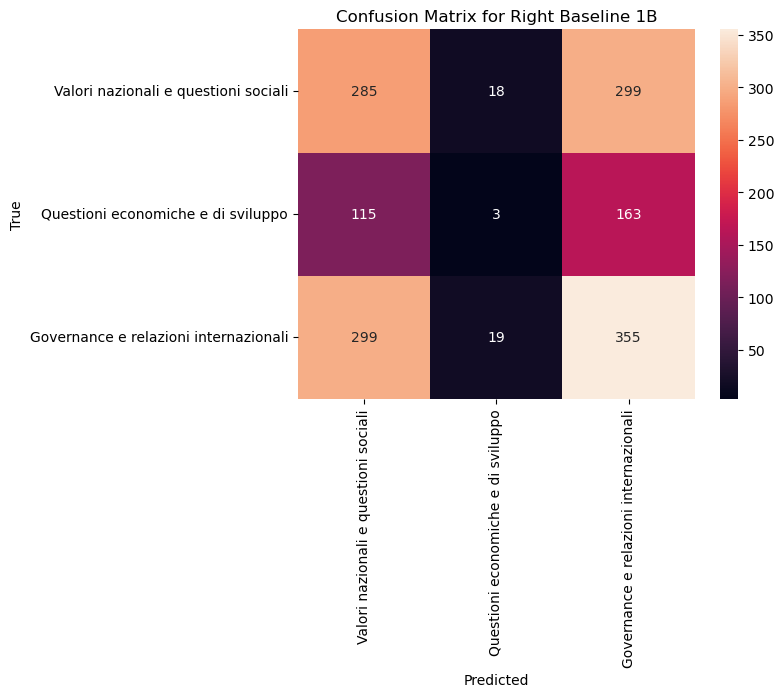

In [21]:
y_pred_right_b= full_pipeline_right.predict(X_test_right_b)
#compute  the confusion matrix and classification report
# Map the predicted and true labels to their textual classes
y_pred_right_b_named = pd.Series(y_pred_right_b).map(class_mapping)
y_test_right_b_named = y_test_right_b['topic_mapping'].map(class_mapping)

# Generate the classification report and confusion matrix
print("Classification Report for Right Baseline 1B:")
print(classification_report(y_test_right_b_named, y_pred_right_b_named))

sns.heatmap(confusion_matrix(y_test_right_b_named, y_pred_right_b_named, labels=y_test_right_b_named.unique()), 
            annot=True, fmt='d', xticklabels=y_test_right_b_named.unique(), yticklabels=y_test_right_b_named.unique())
plt.title('Confusion Matrix for Right Baseline 1B')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
X_test_right_b_f= pd.read_csv('files/finetuned_b/finetuned_b_right.csv')
X_test_left_b_f= pd.read_csv('files/finetuned_b/finetuned_b_left.csv')
y_test_left_b_f = pd.read_csv('files/finetuned_b/finetuned_b_target_left.csv')
y_test_right_b_f = pd.read_csv('files/finetuned_b/finetuned_b_target_right.csv')
X_test_right_b_f = X_test_right_b_f.dropna()
X_test_left_b_f = X_test_left_b_f.dropna()
y_test_right_b_f = y_test_right_b_f.loc[X_test_right_b_f.index]
y_test_left_b_f = y_test_left_b_f.loc[X_test_left_b_f.index]
y_pred_right_b_f= full_pipeline_right.predict(X_test_right_b_f)

/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Classification Report for Right Finetuned 1B:
                                       precision    recall  f1-score   support

Governance e relazioni internazionali       0.44      0.59      0.51       673
   Questioni economiche e di sviluppo       0.21      0.06      0.09       281
 Valori nazionali e questioni sociali       0.40      0.39      0.40       603

                             accuracy                           0.42      1557
                            macro avg       0.35      0.35      0.33      1557
                         weighted avg       0.39      0.42      0.39      1557



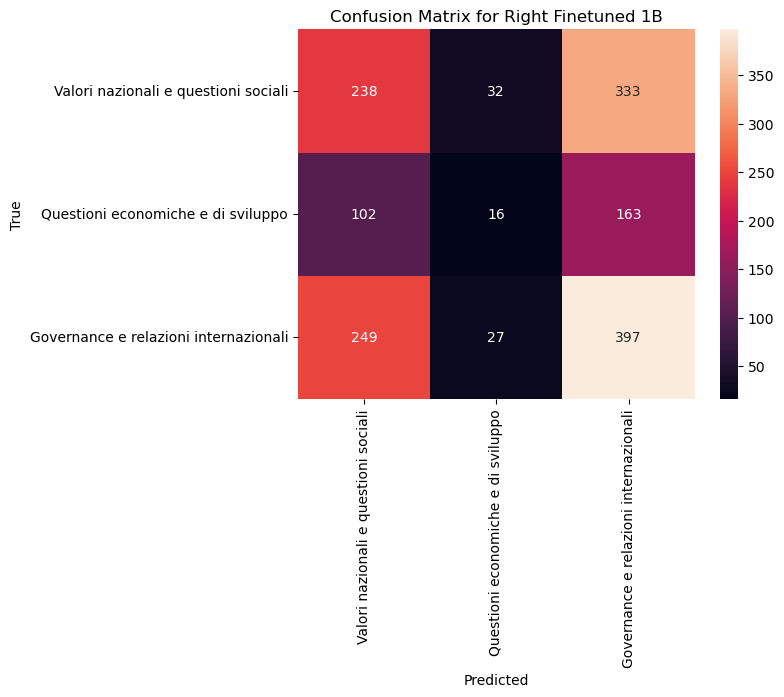

In [23]:
y_pred_right_b_f= full_pipeline_right.predict(X_test_right_b_f)
# Map the predicted and true labels to their textual classes
y_pred_right_b_f_named = pd.Series(y_pred_right_b_f).map(class_mapping)
y_test_right_b_f_named = y_test_right_b_f['topic_mapping'].map(class_mapping)

# Generate the classification report and confusion matrix
print("Classification Report for Right Finetuned 1B:")
print(classification_report(y_test_right_b_f_named, y_pred_right_b_f_named))

sns.heatmap(confusion_matrix(y_test_right_b_f_named, y_pred_right_b_f_named, labels=y_test_right_b_f_named.unique()), 
            annot=True, fmt='d', xticklabels=y_test_right_b_f_named.unique(), yticklabels=y_test_right_b_f_named.unique())
plt.title('Confusion Matrix for Right Finetuned 1B')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Classification Report for Left Baseline 1B:
                                                precision    recall  f1-score   support

          Governance e posizionamento politico       0.60      0.98      0.75      1142
                  Politica economica e sociale       0.19      0.01      0.02       373
Relazioni internazionali e valori progressisti       0.20      0.01      0.02       376

                                      accuracy                           0.59      1891
                                     macro avg       0.33      0.33      0.26      1891
                                  weighted avg       0.44      0.59      0.46      1891



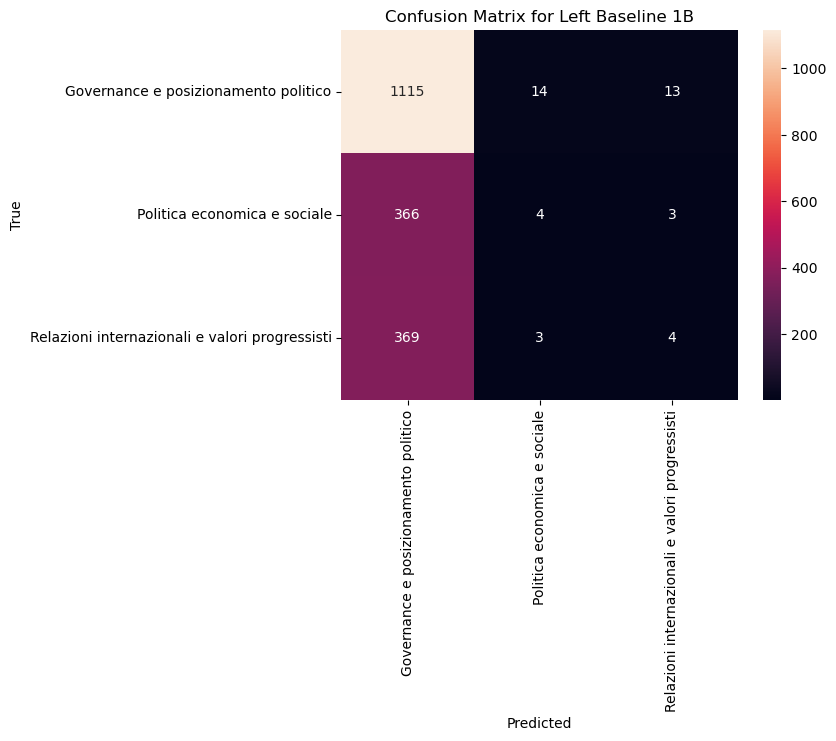

In [24]:
y_pred_left_b= full_pipeline_left.predict(X_test_left_b)
# Map the predicted and true labels to their textual classes
y_pred_left_b_named = pd.Series(y_pred_left_b).map(class_mapping)
y_test_left_b_named = y_test_left_b['topic_mapping'].map(class_mapping)

# Generate the classification report and confusion matrix
print("Classification Report for Left Baseline 1B:")
print(classification_report(y_test_left_b_named, y_pred_left_b_named))

sns.heatmap(confusion_matrix(y_test_left_b_named, y_pred_left_b_named, labels=y_test_left_b_named.unique()), 
            annot=True, fmt='d', xticklabels=y_test_left_b_named.unique(), yticklabels=y_test_left_b_named.unique())
plt.title('Confusion Matrix for Left Baseline 1B')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/Users/filippofocaccia/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Classification Report for Left Finetuned 1B:
                                                precision    recall  f1-score   support

          Governance e posizionamento politico       0.61      0.97      0.75      1143
                  Politica economica e sociale       0.33      0.02      0.03       373
Relazioni internazionali e valori progressisti       0.20      0.02      0.04       376

                                      accuracy                           0.59      1892
                                     macro avg       0.38      0.34      0.27      1892
                                  weighted avg       0.47      0.59      0.46      1892



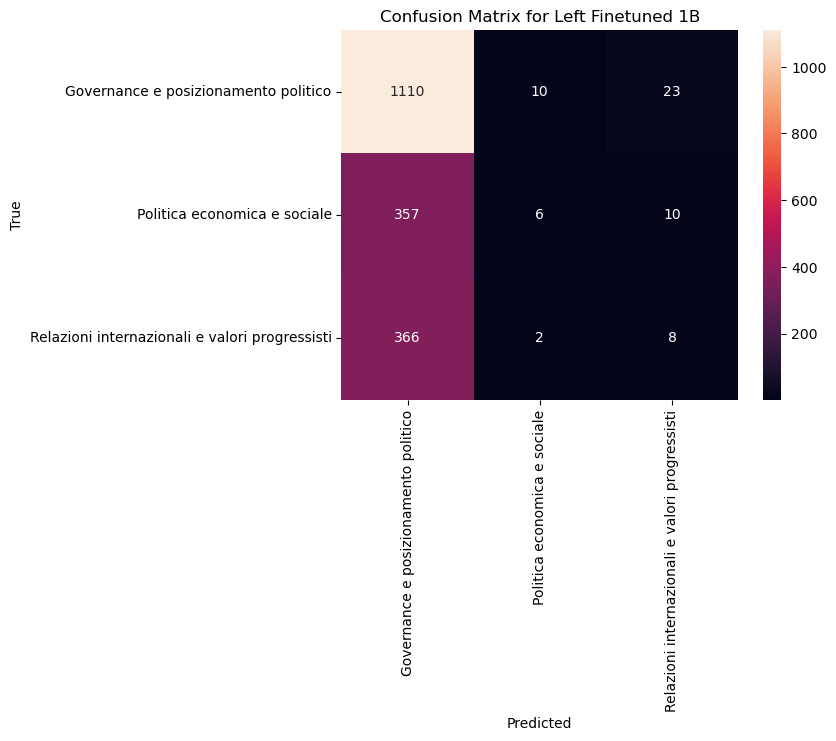

In [25]:
y_pred_left_b_f= full_pipeline_left.predict(X_test_left_b_f)
# Map the predicted and true labels to their textual classes
y_pred_left_b_f_named = pd.Series(y_pred_left_b_f).map(class_mapping)
y_test_left_b_f_named = y_test_left_b_f['topic_mapping'].map(class_mapping)

# Generate the classification report and confusion matrix
print("Classification Report for Left Finetuned 1B:")
print(classification_report(y_test_left_b_f_named, y_pred_left_b_f_named))

sns.heatmap(confusion_matrix(y_test_left_b_f_named, y_pred_left_b_f_named, labels=y_test_left_b_f_named.unique()), 
            annot=True, fmt='d', xticklabels=y_test_left_b_f_named.unique(), yticklabels=y_test_left_b_f_named.unique())
plt.title('Confusion Matrix for Left Finetuned 1B')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Finally we unite the results and compare them

In [ ]:
def compute_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }

results = {
    'Baseline Right': compute_metrics(y_test_right, y_pred_right),
    'Baseline Left': compute_metrics(y_test_left, y_pred_left),
    'Finetuned Right': compute_metrics(y_test_right_f, y_pred_right_f),
    'Finetuned Left': compute_metrics(y_test_left_f, y_pred_left_f),
    'Baseline 1B Right': compute_metrics(y_test_right_b, y_pred_right_b),
    'Baseline 1B Left': compute_metrics(y_test_left_b, y_pred_left_b),
    'Finetuned 1B Right': compute_metrics(y_test_right_b_f, y_pred_right_b_f),
    'Finetuned 1B Left': compute_metrics(y_test_left_b_f, y_pred_left_b_f)
}

results_df = pd.DataFrame(results).T
print(results_df)

                    Accuracy  Precision    Recall  F1-Score
Baseline Right      0.427746   0.390001  0.427746  0.397057
Baseline Left       0.593023   0.452696  0.593023  0.459620
Finetuned Right     0.393706   0.352188  0.393706  0.365280
Finetuned Left      0.593023   0.458998  0.593023  0.465953
Baseline 1B Right   0.413239   0.359226  0.413239  0.378981
Baseline 1B Left    0.593866   0.441319  0.593866  0.458131
Finetuned 1B Right  0.418112   0.387154  0.418112  0.390033
Finetuned 1B Left   0.594080   0.470327  0.594080  0.464332


In [27]:
results_df.to_csv('results_topics.csv', index=True)